<a href="https://colab.research.google.com/github/anmol0720/Classify-Fashion-Items-Using-Neural-Netwroks/blob/master/Classify_Fashion_Items_Using_Neural_Netwroks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [5]:
tf.__version__

'2.2.0-rc3'

In [6]:
keras.__version__

'2.3.0-tf'

In [0]:
fas=keras.datasets.fashion_mnist

In [0]:
(x_train_t,y_train_t),(x_test,y_test)=fas.load_data()

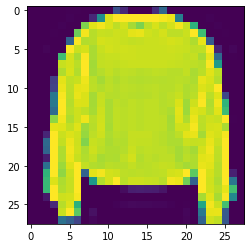

In [112]:
plt.imshow(x_train_t[7])

In [113]:
y_train_t[7]

2

In [0]:
class_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [115]:
class_name[y_train_t[7]]

'Pullover'

*These all Categories are Predefined*

In [116]:
x_train_t[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

These Represent Pixel Values Row wise

Data Normalisation

In [0]:
x_train_n=x_train_t/255.
x_test_n=x_test/255.

*255 because we know our upper bound*

Split Data

In [0]:
X_valid,X_train=x_train_n[:5000],x_train_n[5000:]

In [0]:
y_valid,y_train=y_train_t[:5000],y_train_t[5000:]
X_test=x_test_n

In [120]:
X_train.shape

(55000, 28, 28)

In [121]:
y_train.shape

(55000,)

In [122]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28*28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [126]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


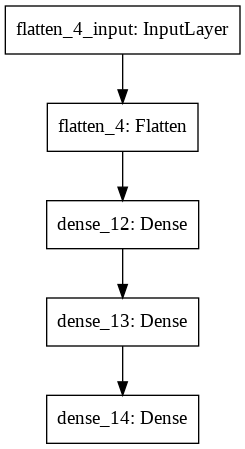

In [127]:
import pydot
keras.utils.plot_model(model)

In [0]:
weights,biases=model.layers[1].get_weights()

In [129]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [130]:
weights.shape

(784, 300)

In [131]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [132]:
biases.shape

(300,)

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [135]:
model_history=model.fit(X_train,y_train,epochs=30,
                        validation_data=(X_valid[:5000],y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7013 - accuracy: 0.7692 - val_loss: 0.5171 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4859 - accuracy: 0.8299 - val_loss: 0.4341 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4430 - accuracy: 0.8439 - val_loss: 0.5362 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4165 - accuracy: 0.8551 - val_loss: 0.3947 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8612 - val_loss: 0.3776 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8666 - val_loss: 0.3709 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy: